In [1]:
# For Leonie AAP EAP CEC - this was initially copied from exp4_extract
# see what we can find about those constructions

# - note that Aligned examples says "hhi" but the scores are actually surprisal
# - todo - multithat examples (currently we are skipping them - only for the umap part, I think)
%load_ext autoreload
%autoreload 2


In [22]:

from lib.exp_common.mlm_result_for_sentence import MLMResultForSentence
from rozlib.libs.common.data.utils_jsonl import read_from_jsonl




/Users/jsrozner/docs_local/research/proj_code/rozner-mono-cxs-main/proj/cxs_are_revealed/paper/cxns_in_distrib/exp1_zhou


In [42]:
from proj.cxs_are_revealed.paper.data_config import Exp1Zhou
from corpus_tools.zhou_cxs_so_difficult.corpus_leonie_eap_aap_cec import CxType, find_in_example_list, fix_labels
import math
from typing import List
from pprint import pp


# enum examples
for name, member in CxType.__members__.items():
    print(f"{name} = {member.value}")

# will correct errors in the original dataset
# as well as one pipeline error

# change here to get the main paper vs appendix results
do_correct = True



aap_causal = 1
eap_noncausal = 2
cec = 3
oce = 4
invalid = 5


# read in data

In [43]:
# read in mlm RoBERTA scores outputs
# for the main cec vs eap/aap we have surprisal scores

# mlm_results_hhi = read_mlm_results(use_orig_hhi=True)
# print(len(mlm_results_hhi))

# mlm_results_surprisal = read_mlm_results(use_orig_hhi=False)
mlm_results_surprisal = read_from_jsonl(
    Exp1Zhou.zhou_global_affinities_surprisal, 
    MLMResultForSentence
)
print(len(mlm_results_surprisal))

# all come in sets of 5 
# (we implemented their 5 different perturbations, but we only consider the unperturbed versions here)
# print(len(mlm_results_hhi)/5)
print(len(mlm_results_surprisal)/5)

# note: not sure why we hav diff numbers across the two datasets
# -> likely because the second dataset did not run affinities, so multitoken examples were not dropped
# original data (HHI) - 1290, 258
# new data (surprisal) - 1385, 277


1385
277.0


In [44]:
from corpus_tools.zhou_cxs_so_difficult.corpus_leonie_eap_aap_cec import get_clean_exs

# read in original data

# note: processing errors were for punctuation, etc that we did not deal with
# in the original dataset

# note also that we potentially have alignment issues since we are rerunning
# the dataset cleaning code (which has changed), so we may (and do!) have differences now
all_exs = get_clean_exs(Exp1Zhou.zhou_original_xlsx,print_errors=True)
print(len(all_exs))

/Users/jsrozner/docs_local/research/proj_code/rozner-mono-cxs-main/proj/cxs_are_revealed/src/corpus_tools/zhou_cxs_so_difficult/corpus_leonie_eap_aap_cec.py:35: UserWarning: in get_all_exs for leonie corpus; minimal clean is set to FALSE
  warnings.warn(f"in get_all_exs for leonie corpus; minimal clean is set to {str(minimal_clean).upper()}")
/Users/jsrozner/docs_local/research/proj_code/rozner-mono-cxs-main/proj/cxs_are_revealed/src/corpus_tools/zhou_cxs_so_difficult/corpus_leonie_eap_aap_cec.py:290: UserWarning: Multiple thats - check multithat to see; we are linking to first that
  warnings.warn("Multiple thats - check multithat to see; we are linking to first that")


unhandled apostrophe [']
	Mendes was so dissatisfied with his first three days ' filming that he obtained permission from DreamWorks to reshoot the scenes . 

Unrecognized $ in In fact , I was so ecstatic that I invested in a 55 $ metal cutting blade . 

Unrecognized $ in I am so frustrated that a $ 500 purchase brought such short lived joy . 

No terminating quote! in She said , " I am super - excited to stay , and I am so honored that they asked me to stay . 

unhandled apostrophe [']
	Dow is so insistent that it closed in the 1870s and was converted into an Emigrants ' Home , Butt supports this with a date of 1879 and Anderson gives 1880 . 

Adj [overwhelmed] not found in sentence 
She said she was so "overwhelmed that she got the part and was looking forward to the challenge".


string index out of range 

No terminating quote! in Jean Edward Smith maintains , " The evidence is so overwhelming that during the Vicksburg campaign he occasionally fell off the wagon . 

unhandled apost

In [45]:


find_in_example_list(all_exs, 99)



BaseExample(id=99, adj='positive', label=<CxType.eap_noncausal: 2>, sentence_orig="An hour later , however , they 're still alive which confuses Elijah and Rebekah , as they were (so) positive that Klaus originated their bloodline and were sure it was n't Kol Mikaelson ( Nathaniel Buzolic ) .", _sentence_punct_fixed="An hour later, however, they're still alive which confuses Elijah and Rebekah, as they were so positive that Klaus originated their bloodline and were sure it wasn't Kol Mikaelson (Nathaniel Buzolic).", has_error=False, multi_that=False, so_idx=15, adj_idx=16, that_idx=17)

In [46]:
# note: that we have some multithat examples that are included in part of the analysis and excluded in other parts
def count_multi_that():
    ct = 0
    for ex in all_exs:
        if not ex.multi_that: continue

        ct+=1
        print(ex.sentence_orig)
        # print(ex.id, ex.adj, ex.label)
    print(ct)
count_multi_that()

Marie is (so) amazed that he came up with that so quickly .
The man was so annoyed that he slept hungry and the next morning he chewed so much of a plant that he took on Shaman powers .
He was (so) concerned that there were provisions in the bill that were open to abuse .
On the second occasion , Li informed him of Emperor Wu 's passing , and Su was so despondent that in mourning that he vomited blood .
Susan feels so guilty that Mike fell asleep at the reception due to all the night jobs he has done for her plans , so she asks the reverend if he has time later that night .
For example , Zhu Youliang ( ) the Prince of Heng , an older cousin of the emperor 's , was so honored at court at that time that even Li Yu 's superior , the chief of staff Li Zhen , kneeled to him .
He was so impressed that he started a craze for the test that has never diminished .
He was so indebted that he sold his Irish estates and used that money to invest in South Sea Company stock .
When he nevertheless pub

In [47]:
for name, member in CxType.__members__.items():
    print(f"{name} = {member.value}")


aap_causal = 1
eap_noncausal = 2
cec = 3
oce = 4
invalid = 5


In [48]:
from proj.cxs_are_revealed.paper.cxns_in_distrib.exp1_zhou.exp1_utils import align_mlm_results_with_input_data

# from paper.exp1_zhou.exp5_utils import fix_labels

# align results with outputs

aligned_results_surprial = align_mlm_results_with_input_data(mlm_results_surprisal, all_exs)
# aligned_results_hhi = align_mlm_results_with_input_data(mlm_results_hhi, all_exs)

# note 8 examples didn't run because of accents

def find_in_aligned(id: int):
    res = [e for e in aligned_results_surprial if e.orig_example.id == id]
    print(len(res))
    assert len(res) == 5
    return res

def correct():
    """
    Fix zhu you liang which somehow had the wrong value - manually fix
    """
    res = find_in_aligned(72)
    one_res = res[0]
    one_res.mlm_result.hhi_scores[one_res.orig_example.so_idx] = 0.01
    pp(res)

if do_correct:
    fix_labels(all_exs)
    correct()


Northern Liang's duke Juqu Mengxun became so apprehensive that he offered to yield his territory and relocate his entire army into Later Qin proper.
missing Hergé became so annoyed that Casterman then sent the book to the printers without his final approval.
She was so determined that she continued her training even after breaking both her wrists in a childhood accident.
missing After Villa's raid on Ciudad Juárez in June 1919 (in which Ángeles did not participate), Ángeles became so despondent that there was no solution to the long and bloody civil war.
The people were so elated that their livelihoods remained intact, even though much of their town was destroyed.
missing King Pedro IV was so elated that he proclaimed St. Francis his savior and renamed his base São Francisco de Kibangu.
Rommel was so indignant that the British expected to find his headquarters 250 miles behind his front.
missing Klement was so indignant that he decided together with Václav Laurin, to start repairing bi

In [49]:
print(len(aligned_results_surprial)/5)
# print(len(aligned_results_hhi)/5)


277.0


In [50]:
def find_aligned_for_id(aligned, id: int):
    for a in aligned:
        if a.orig_example.id == id:
            pp(a.orig_example)
            print(math.exp(-a.mlm_result.hhi_scores[a.orig_example.so_idx]))
            break

# find_aligned_for_id(aligned_results_hhi, 6)
find_aligned_for_id(aligned_results_surprial, 6)


BaseExample(id=6,
            adj='annoyed',
            label=<CxType.cec: 3>,
            sentence_orig='The man was so annoyed that he slept hungry and the '
                          'next morning he chewed so much of a plant that he '
                          'took on Shaman powers .',
            _sentence_punct_fixed='The man was so annoyed that he slept hungry '
                                  'and the next morning he chewed so much of a '
                                  'plant that he took on Shaman powers.',
            has_error=False,
            multi_that=True,
            so_idx=3,
            adj_idx=4,
            that_idx=5)
0.9973458646862502


# Present HHI/surprisal-based separation

In [51]:
from typing import Dict
from collections import defaultdict

def get_hists(aligned):
    """
    For all the aligned results, accumulate according to the phrase type (4 types)
    the hhi scores
    """
    # we get a histogram of the HHI scores
    hists: Dict[int, List[float]] = defaultdict(list)
    for i, aligned_res in enumerate(aligned):
        # we want the so, that with nothing changed
        if i%5 != 0: continue
        
        ex = aligned_res.orig_example
        res = aligned_res.mlm_result
        
        so_idx = ex.so_idx
        so_hhi = res.hhi_scores[so_idx]
        print(f"{i}: {ex.label}")
        hists[ex.label.value].append(so_hhi)

    return hists


hists = get_hists(aligned_results_surprial)

# convert to probabilities rather than surprisal to make the histogram easier to read
hists_probs = {k: [math.exp(-x) for x in v] for k,v in hists.items()}

0: CxType.cec
5: CxType.invalid
10: CxType.cec
15: CxType.aap_causal
20: CxType.cec
25: CxType.aap_causal
30: CxType.cec
35: CxType.cec
40: CxType.aap_causal
45: CxType.aap_causal
50: CxType.aap_causal
55: CxType.cec
60: CxType.aap_causal
65: CxType.cec
70: CxType.eap_noncausal
75: CxType.cec
80: CxType.eap_noncausal
85: CxType.cec
90: CxType.eap_noncausal
95: CxType.cec
100: CxType.eap_noncausal
105: CxType.cec
110: CxType.eap_noncausal
115: CxType.cec
120: CxType.eap_noncausal
125: CxType.cec
130: CxType.aap_causal
135: CxType.cec
140: CxType.aap_causal
145: CxType.cec
150: CxType.cec
155: CxType.eap_noncausal
160: CxType.cec
165: CxType.aap_causal
170: CxType.cec
175: CxType.aap_causal
180: CxType.cec
185: CxType.aap_causal
190: CxType.aap_causal
195: CxType.aap_causal
200: CxType.aap_causal
205: CxType.cec
210: CxType.aap_causal
215: CxType.cec
220: CxType.eap_noncausal
225: CxType.cec
230: CxType.aap_causal
235: CxType.cec
240: CxType.aap_causal
245: CxType.cec
250: CxType.aap_cau

In [52]:
# check that the hist totals are what we expect
def get_hist_totals():
    total_ct = 0
    print("distribution by label category")
    for k,v in hists.items():
        print(k, len(v))
        total_ct += len(v)
    return total_ct

# 258 agrees
assert get_hist_totals() == len(mlm_results_surprisal)/ 5

distribution by label category
3 101
5 5
1 70
2 21
4 80


In [53]:


def merge_oce_cec(hists_probabilities):
    h = [hists_probabilities[x] for x in range(1,5)]

    # merge oce and cec into a single class
    hists_merge_oce_cec = []

    hists_merge_oce_cec.append(h[0])
    hists_merge_oce_cec.append(h[1])
    hists_merge_oce_cec.append(h[2])
    hists_merge_oce_cec[2].extend(h[3])     # cec / oce

    return hists_merge_oce_cec

hists_merged_oce_cec = merge_oce_cec(hists_probs)
labels = ['aap', 'eap', 'cec', 'oce']



[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Initializing fig saver at dir /Users/jsrozner/docs_local/research/proj_code/rozner-mono-cxs-main/proj/cxs_are_revealed/supplemental/figs


/Users/jsrozner/docs_local/research/proj_code/rozner-mono-cxs-main/rozlib-python/rozlib/libs/plotting/utils_latex_matplot.py:44: UserWarning: /Library/TeX/textbin will be added to path
  warnings.warn(f"/Library/TeX/textbin will be added to path")


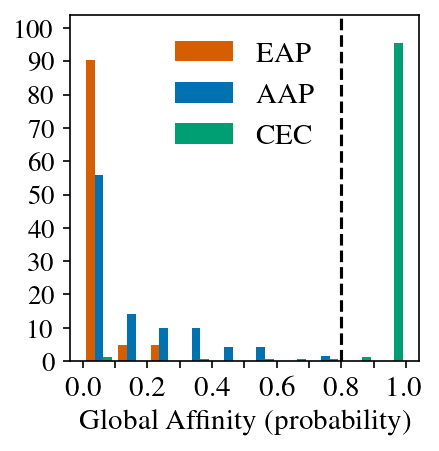

In [54]:
from make_graphics.graphics import Colors, make_fig_saver
from rozlib.libs.plotting.utils_latex_matplot import config_matplot_for_latex
from lib.utils.utils_misc import save_fig
import matplotlib.pyplot as plt
import numpy as np

# eap, aap, cec
# leonie_colors = ['#DC267F','#785EF0', '#FE6100']

def plot_overlapping(
        hist_values: List[List[float]],
        legend_labels: List[str],
        save = False
):
    fig, ax = plt.subplots(figsize=figsize)
    # plt.figure(figsize=(3,2))
    bins = np.linspace(0, 1.0, 11)
    print(bins)
    plt.hist(hist_values,
             bins,
             # eap, aap, cec
             label=legend_labels,
             # color=leonie_colors,
             color = Colors.cec_clist,
             # color = list(plt.cm.Dark2.colors[:3]),
             # colors=colors[:3],
             density=True   # will be probabilities
             )

    bin_centers = bins

    bin_labels = [f'{start:.1f}' for start in bins]
    # every other tick
    bin_labels = [b if i % 2 == 0 else '' for i, b in enumerate(bin_labels)]

    # grid lines etc
    # ax.grid(False)

    ax.set_ylim(0, 10.4)

    # plt.xticks(bin_centers, [f'{x:.1f}' for x in bins])  # Format bin centers as x-tick labels
    # plt.xticks(bin_centers, bin_labels)  # Format bin centers as x-tick labels
    ax.set_xticks(bin_centers, bin_labels)  # Format bin centers as x-tick labels
    ax.set_yticks(range(0,11, 1), labels=range(0, 110, 10))

    plt.tick_params(axis="both", which="minor")

    # Set custom y-ticks
    # y_ticks = np.linspace(0, max(counts), 11)  # Create evenly spaced y-ticks
    # plt.yticks(y_ticks, [f'{tick:.2f}' for tick in y_ticks])  # Format y-tick labels

    # removed for latex
    # plt.title("Probability of 'so' by construction class")
    # plt.xlabel("Contextual probability of 'so'")    # todo: italics
    # plt.axvline(x=0.8, color='black', linestyle='--', linewidth=1.5, label='Classifier threshold')

    ax.set_xlabel("Global Affinity (probability)")    # todo: italics
    # plt.ylabel("Percent of examples in bin")
    # plt.ylabel("Percent examples in bin")
    ax.axvline(x=0.8, color='black', linestyle='dashed', linewidth=1.5)
    # plt.legend(loc='upper center', frameon=False)
    ax.legend(loc='upper center', frameon=False)
    # plt.show()
    if do_correct:
        plt_append = "corrected"
    else:
        plt_append = "uncorrected"

    if save:
        save_fig(fig, f"fig_cec_aap_hist_{plt_append}.pdf")
    return fig


# for appendix
config_matplot_for_latex(12)
figsize = (5,3) # for appendix


# for multiplot in main paper text
figsize = (3,3) # for multiplot
config_matplot_for_latex(14, legend_font_change=0)

# make it EAP, AAP, CEC
reordered = [hists_merged_oce_cec[1], hists_merged_oce_cec[0], hists_merged_oce_cec[2]]
plot_legend = ['EAP', 'AAP', 'CEC']
fig = plot_overlapping(reordered, plot_legend,
                 save=True)
figsaver = make_fig_saver()
figsaver.save(fig, f"fig1_histogram_{do_correct}.pdf")
# plt.savefig("../../", bbox_inches="tight")



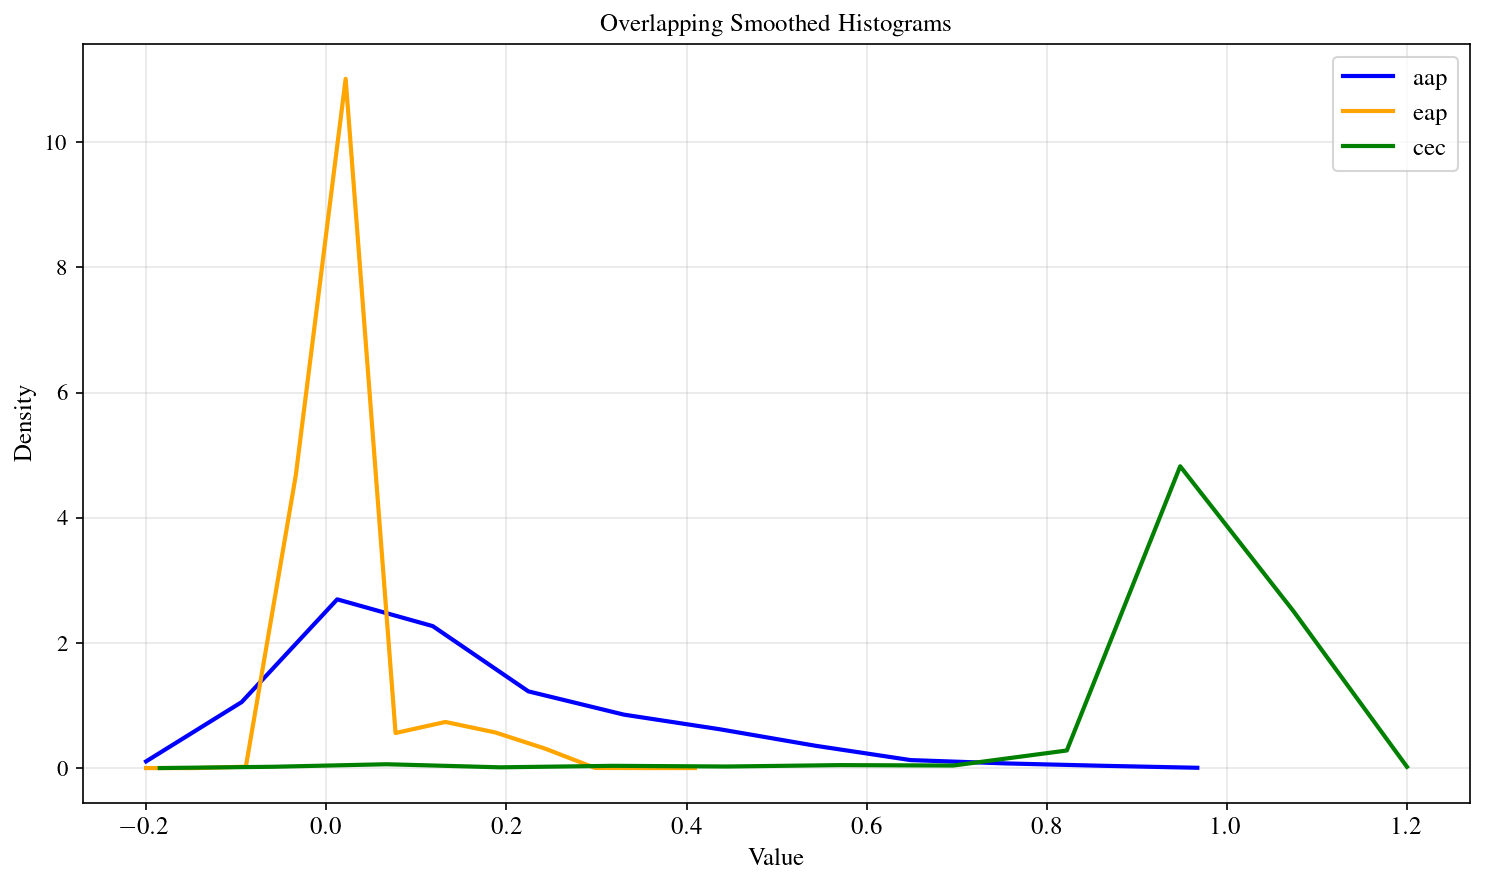

In [38]:

def plot_smoothed_hist(datasets, colors, labels):
    # Plotting
    plt.figure(figsize=(10, 6))

    # Loop through datasets to plot smoothed histograms
    for data, color, label in zip(datasets, colors, labels):
        # Estimate the density
        density = gaussian_kde(data)
        xs = np.linspace(min(data)-.2, max(data)+0.2, 12)  # Define the range
        density.covariance_factor = lambda: 0.5  # Smoothing parameter
        density._compute_covariance()
        plt.plot(xs, density(xs), label=label, color=color, linewidth=2)

    # Add legend, labels, and title
    plt.legend()
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title("Overlapping Smoothed Histograms")
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # Show the plot
    plt.show()

# note that we are not actually going to use this plot
plot_smoothed_hist(
    hists_merged_oce_cec,
    colors = ['blue', 'orange', 'green', 'red'][:3],
    labels = labels[:3]
)



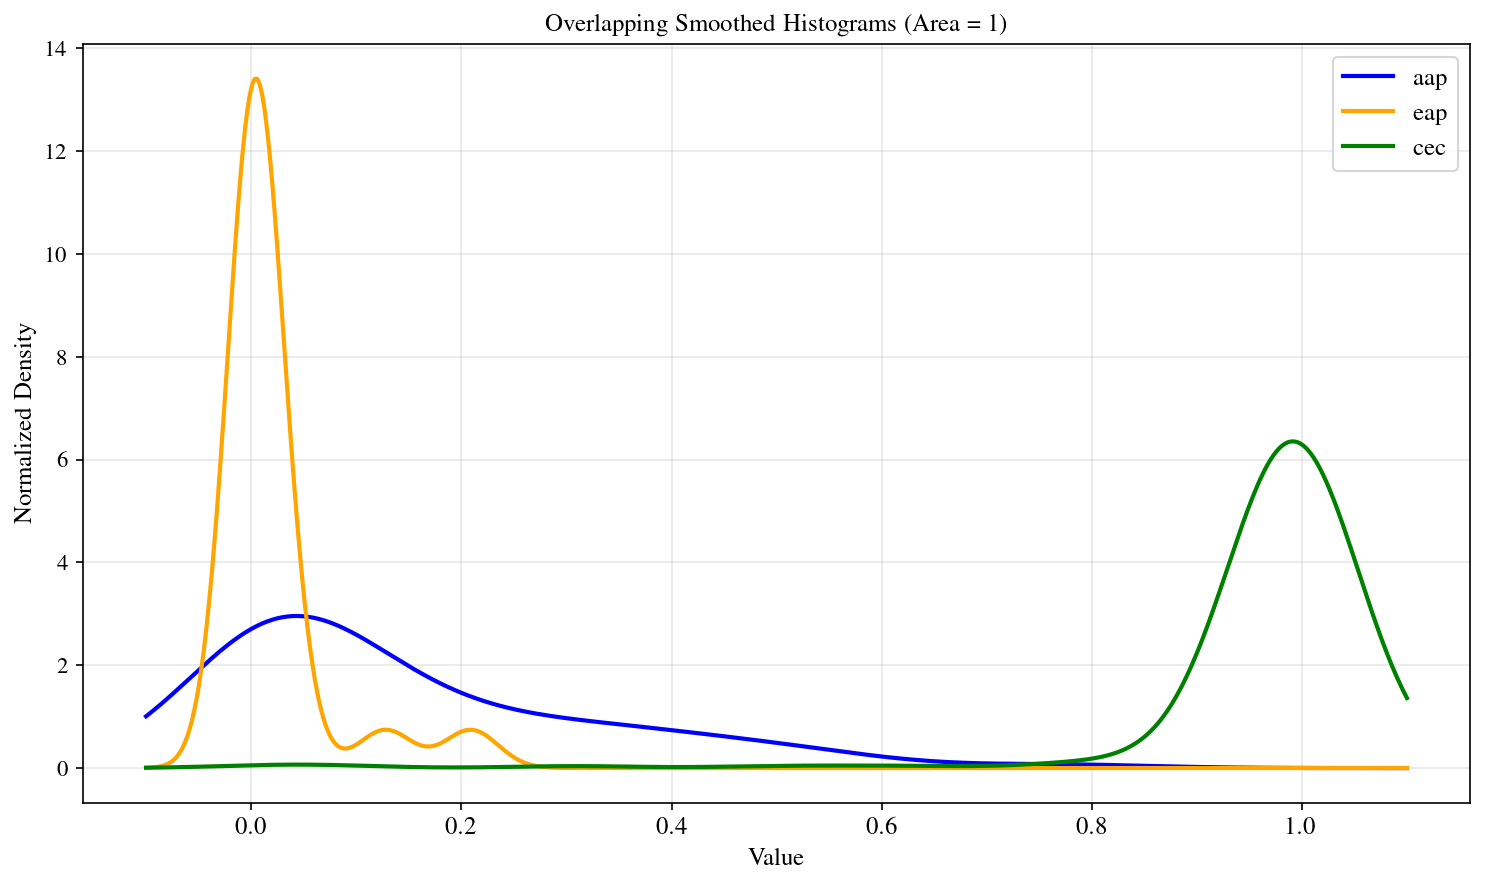

In [42]:
from scipy.stats import gaussian_kde

def plot_smoothed_hist(datasets, colors, labels):
    # Compute a shared x-range across all datasets
    all_data = np.concatenate(datasets)
    xs = np.linspace(all_data.min() - 0.1, all_data.max() + 0.1, 500)

    plt.figure(figsize=(10, 6))

    for data, color, label in zip(datasets, colors, labels):
        density = gaussian_kde(data)
        density.covariance_factor = lambda: 0.5
        density._compute_covariance()

        ys = density(xs)
        ys /= np.trapz(ys, xs)  # Normalize: area under curve = 1

        plt.plot(xs, ys, label=label, color=color, linewidth=2)

    plt.legend()
    plt.xlabel("Value")
    plt.ylabel("Normalized Density")
    plt.title("Overlapping Smoothed Histograms (Area = 1)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# note that we are not actually going to use this plot
plot_smoothed_hist(
    hists_merged_oce_cec,
    colors = ['blue', 'orange', 'green', 'red'][:3],
    labels = labels[:3]
)


## Examine outliers

In [146]:

# let's identify the funny ones
def find_outliers(label: int, min_score, max_score):
    # we get a histogram of the HHI scores
    # hists: Dict[int, List[float]] = defaultdict(list)
    keep = []
    total_ct = 0
    for i, aligned_res in enumerate(aligned_results_surprial):

        # we want the so, that with nothing changed
        if i%5 != 0: continue
        ex = aligned_res.orig_example
        res = aligned_res.mlm_result

        if ex.label.value == 5:
            # invalid
            continue
        total_ct += 1

        if ex.label.value != label: continue

        so_idx = ex.so_idx

        # so_hhi = res.hhi_scores[so_idx]
        so_hhi = math.exp(-res.hhi_scores[so_idx])

        if so_hhi > min_score and so_hhi < max_score:
            # keep.append(i)
            keep.append(ex.id)
    print(f"total: {total_ct}")
    return keep

#AAP, EAP, CEC, OCE
for bound in np.arange(.75,0.9, 0.01):
    outlier_sets = [
        (bound, 1),
        (bound, 1),
        (0, bound),
        (0,bound)
    ]
    print(len(aligned_results_surprial))
    ct = 0
    for i, bounds in enumerate(outlier_sets):
        print(i+1, bounds)
        lower, upper = bounds
        outliers = find_outliers(i + 1, lower, upper)
        # print(len(outliers))
        ct += len(outliers)
    print(ct)
# outliers = find_outliers(2, 0.8, 1)
# outliers = find_outliers(3, 0, 0.8)
# outliers = find_outliers(4, 0, 0.8)



1385
1 (0.75, 1)
total: 272
2 (0.75, 1)
total: 272
3 (0, 0.75)
total: 272
4 (0, 0.75)
total: 272
6
1385
1 (0.76, 1)
total: 272
2 (0.76, 1)
total: 272
3 (0, 0.76)
total: 272
4 (0, 0.76)
total: 272
6
1385
1 (0.77, 1)
total: 272
2 (0.77, 1)
total: 272
3 (0, 0.77)
total: 272
4 (0, 0.77)
total: 272
5
1385
1 (0.78, 1)
total: 272
2 (0.78, 1)
total: 272
3 (0, 0.78)
total: 272
4 (0, 0.78)
total: 272
5
1385
1 (0.79, 1)
total: 272
2 (0.79, 1)
total: 272
3 (0, 0.79)
total: 272
4 (0, 0.79)
total: 272
6
1385
1 (0.8, 1)
total: 272
2 (0.8, 1)
total: 272
3 (0, 0.8)
total: 272
4 (0, 0.8)
total: 272
6
1385
1 (0.81, 1)
total: 272
2 (0.81, 1)
total: 272
3 (0, 0.81)
total: 272
4 (0, 0.81)
total: 272
7
1385
1 (0.8200000000000001, 1)
total: 272
2 (0.8200000000000001, 1)
total: 272
3 (0, 0.8200000000000001)
total: 272
4 (0, 0.8200000000000001)
total: 272
8
1385
1 (0.8300000000000001, 1)
total: 272
2 (0.8300000000000001, 1)
total: 272
3 (0, 0.8300000000000001)
total: 272
4 (0, 0.8300000000000001)
total: 272
8
1

In [154]:
bound = 0.8
outlier_sets = [
    (bound, 1),
    (bound, 1),
    (0, bound),
    (0,bound)
]
print(len(aligned_results_surprial))
ct = 0
for i, bounds in enumerate(outlier_sets):
    print(i+1, bounds)
    lower, upper = bounds
    outliers = find_outliers(i + 1, lower, upper)
    print(outliers)
    ct += len(outliers)
print(ct)


1385
1 (0.8, 1)
total: 272
[]
2 (0.8, 1)
total: 272
[]
3 (0, 0.8)
total: 272
[108, 120, 240, 257, 312]
4 (0, 0.8)
total: 272
[150]
6


In [155]:
# print(len(all_exs))
# print(all_exs[:2])
# print(sorted([ex.id for ex in all_exs]))
find_in_example_list(all_exs, 150)

BaseExample(id=150, adj='accomplished', label=<CxType.oce: 4>, sentence_orig='By 1844 , he was so accomplished that his father gathered together as much money as he could ( apparently even selling the family piano ) and sent him to study in Rome at the Accademia di San Luca .', _sentence_punct_fixed='By 1844, he was so accomplished that his father gathered together as much money as he could (apparently even selling the family piano) and sent him to study in Rome at the Accademia di San Luca.', has_error=False, multi_that=False, so_idx=4, adj_idx=5, that_idx=6)

In [115]:
x = find_outliers(1, 0.8, 1)


In [63]:
for idx in outliers:
    aligned_res = aligned_results_surprial[idx]
    ex = aligned_res.orig_example
    res = aligned_res.mlm_result
    # print(idx)
    print(ex)
    print(res.multi_tok_indices)
    print(res.sentence)
    # print(res.hhi_scores[ex.so_idx])
    print(math.exp(-res.hhi_scores[ex.so_idx]))